# Tranquilizers


It was asked about personal use of any form of prescription tranquilizers that were not prescribed for a someone or that someone took only for the experience or feeling they caused.

In [4]:
#disable some annoying warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

#plots the figures in place instead of a new window
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

In [5]:
#data is a tsv file therefore read it as a csv file with \t as the seperator
dataset = pd.read_csv('data/drugs-dataset.tsv', delimiter = '\t')

In [6]:
case_quest_data = dataset.ix[:,0:2].copy()
tranquilizers = dataset.ix[:,'KLONOPIN':'TRDAYPWK'].copy() # tranquilizers dataset

### 1. How many cases used the drug
There are 4703 used cases in the survey.

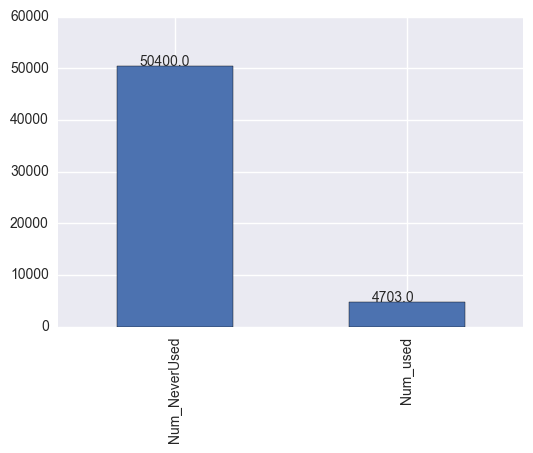

In [9]:

Num_NeverUsed=tranquilizers.query('KLONOPIN ==91').shape[0]
Num_used=tranquilizers.query('(KLONOPIN ==1)|(XNAXATVN ==1)|(VALMDIAZ ==1)|(TRNCARD ==1)').shape[0]
Num =  {"Num":{"Num_NeverUsed":Num_NeverUsed, "Num_used":Num_used }}
DF_Num=pd.DataFrame(Num).sort_values('Num', ascending = False)

ax = DF_Num['Num'].plot.bar()

for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x()+0.1 , p.get_height()+50))

###  2.What are their age range?



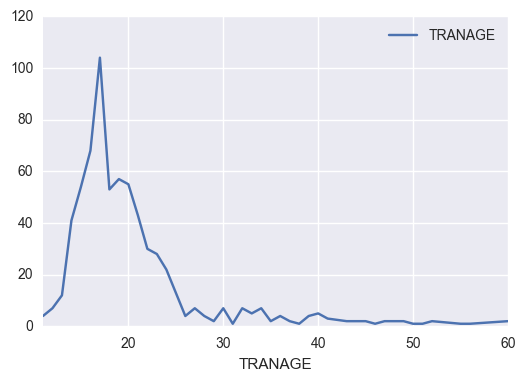

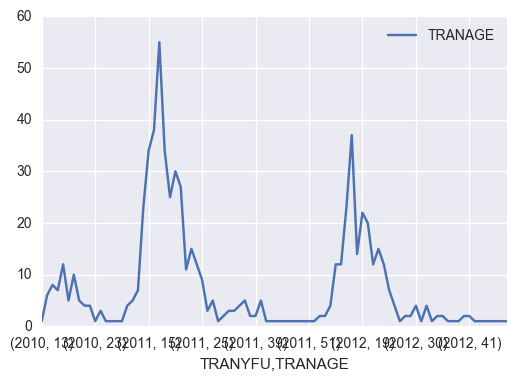

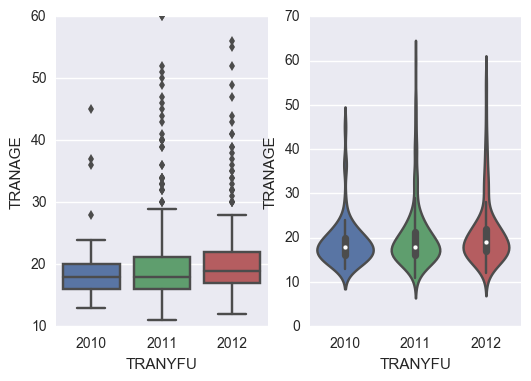

In [12]:
#query_data those who have used any one of the hallucinogens
tranquilizers_1=tranquilizers.query('((KLONOPIN ==1)|(XNAXATVN ==1)|(VALMDIAZ ==1)|(TRNCARD ==1))&(TRANAGE <69)&(TRANYFU<=2013)')
count = tranquilizers_1.groupby('TRANAGE').agg({ 'TRANAGE': 'count'})
count.plot()

#hallucinogens_LSD.plot(kind='scatter', x='HALLAGE',y='LSD')

# year & age
count_year = tranquilizers_1.groupby(['TRANYFU','TRANAGE']).agg({ 'TRANAGE': 'count'})
count_year.plot()

tranquilizers_1.plot(kind='scatter', x='TRANYFU',y='TRANAGE')

#playing with categories ... seaborn is pretty good with it
#plt.figure(figsize=(40,20))
plt.subplot(121)
sns.boxplot(x='TRANYFU',y='TRANAGE',data=tranquilizers_1)

plt.subplot(122)
sns.violinplot(x='TRANYFU',y='TRANAGE',data=tranquilizers_1)


### 3.How frequently they use it?

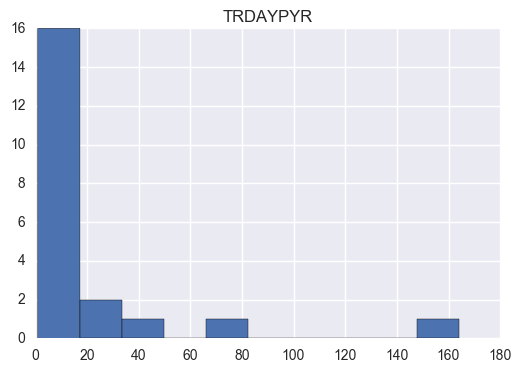

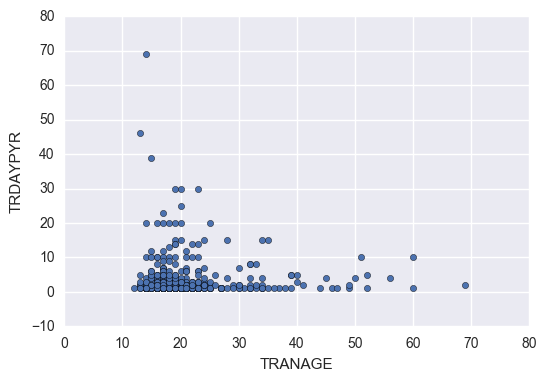

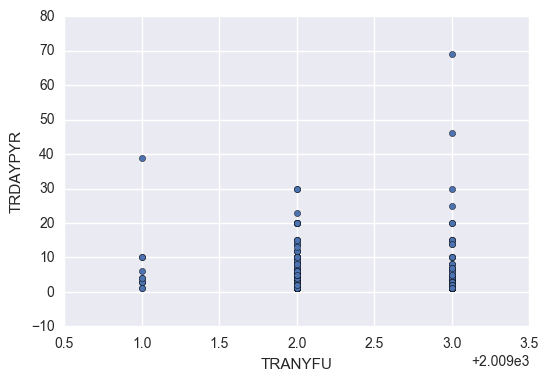

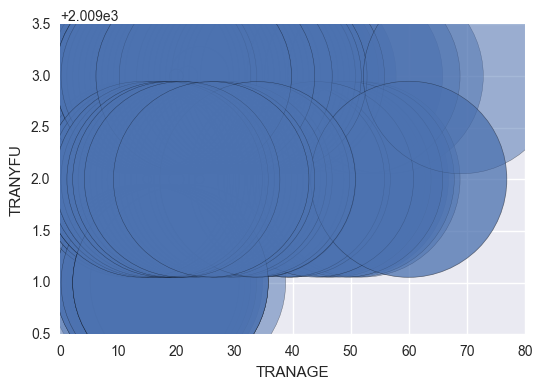

In [13]:
tranquilizers_fre=tranquilizers.query('(TRDAYPYR<985)&(TRANAGE <=69)& (TRANYFU<=2012)')
count_days = tranquilizers_fre.groupby('TRDAYPYR').agg({ 'TRDAYPYR': 'count'})
count_days.hist()

tranquilizers_fre.plot(kind='scatter', x='TRANAGE',y='TRDAYPYR')
tranquilizers_fre.plot(kind='scatter', x='TRANYFU',y='TRDAYPYR')
tranquilizers_fre.plot(kind='scatter', x='TRANAGE',y='TRANYFU',s=tranquilizers['TRDAYPYR']*20,alpha=0.5)

### 4.Did they stop and go back to it? Are they planning to quit?

1 = Within the past 30 days
2 = More than 30 days ago but within the past 12 mons
3 = More than 12 months ago 

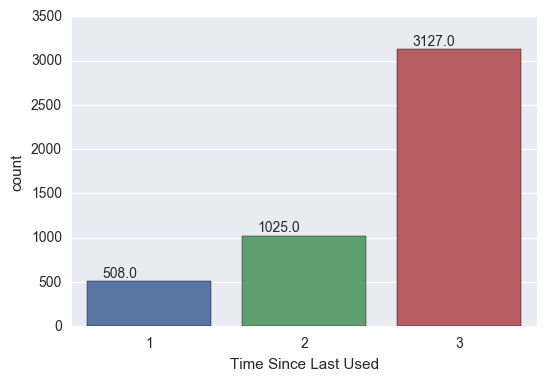

In [15]:

tranquilizers_quit=tranquilizers.query('TRANREC<4')
ax = sns.countplot(tranquilizers_quit['TRANREC'])
plt.xlabel('Time Since Last Used')
for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

## Next

[Stimulants](Stimulants.ipynb)